# christsakm@gmail.com
This Jupiter Notebook is created as an answer to the following assignement (https://github.com/Workearly/Final-Assignment).

For the MySQL connection make sure that you have a local mariaDB server running on PORT 3306 with a user 'root' and no password.

In [1]:
hostname = "localhost"
username = "root"
password = ""
port = 3306

### Imports

In [2]:
# %pip install SQLAlchemy, pandas, matplotlib
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt

### Step 1

In [3]:
engine = create_engine(f'mysql://{username}:{password}@{hostname}:{port}')

with open('finance_liquor_sales.sql', 'r') as f:
    script = text(f.read())

### Step 2

In [4]:
query_1 = """
SELECT * 
FROM `finance_liquor_sales` 
WHERE date BETWEEN '2016/01/01' AND '2019/12/31'
;"""

with engine.connect() as conn:
    conn.execute(script)
    df_liquor = pd.read_sql_query(text(query_1), conn)

### Step 3

In [5]:
df_liquor.to_csv("df_liquor.csv")

### Step 4

In [6]:
# group data by zip_code and item_description, and sum the bottles_sold
grouped = df_liquor.groupby(['zip_code', 'item_description'])['bottles_sold'].sum().reset_index()

# sort the data by zip_code and bottles_sold
sorted_data = grouped.sort_values(['zip_code', 'bottles_sold'], ascending=[True, False])

# get the most popular item_description for each zip_code
popular_items = sorted_data.groupby('zip_code').first().reset_index()

# group data by zip_code and store_name, and sum the bottles_sold
grouped = df_liquor.groupby(['zip_code', 'store_name'])['bottles_sold'].sum().reset_index()

# join data with popular_items to get the most popular item for each store
result = pd.merge(grouped, popular_items, on='zip_code', how='left')

# calculate percentage of sales for each store
result['percentage'] = result['bottles_sold_x'] / result['bottles_sold_y'] * 100

# get the most popular item sold for each store
result = result.groupby(['zip_code', 'store_name']).apply(lambda x: x.loc[x['percentage'].idxmax()]).reset_index(drop=True)


### Step 5

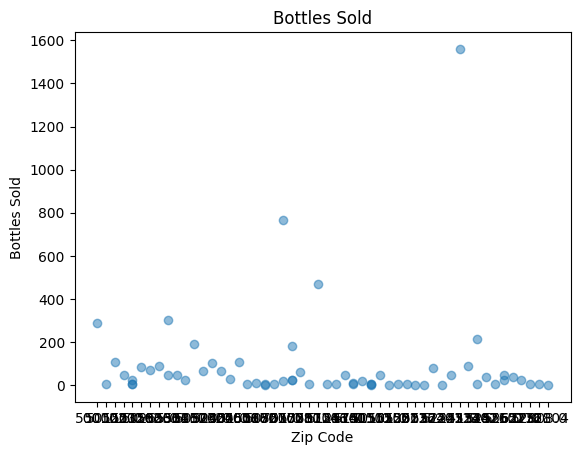

In [7]:
plt.scatter(result['zip_code'], result['bottles_sold_x'], alpha=0.5)
plt.xlabel('Zip Code')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold')
plt.show()